# Arrhythmia Classification using random forest

The data is the MIT-BIH Arrhythmia Database from Physionet. We aim to classify the beat types into 5 different types: N-Normal, S-Supraventricular ectopic, V-Ventricular ectopic, F-Fusion, and Q-Unknown

Importing required libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

In [43]:
train = pd.read_csv(r'C:\Users\bccpe\Downloads\mitbih_train.csv',header=None)
test= pd.read_csv(r'C:\Users\bccpe\Downloads\mitbih_test.csv',header=None)
train.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
train.shape

(87554, 188)

In [45]:
train.rename(columns = {187:'label'}, inplace = True)
test.rename(columns = {187:'label'}, inplace = True)

Check for nulls and duplicates

In [7]:
train.isnull().sum().sum()

0

In [8]:
train.duplicated().sum()

0

<AxesSubplot:xlabel='label', ylabel='count'>

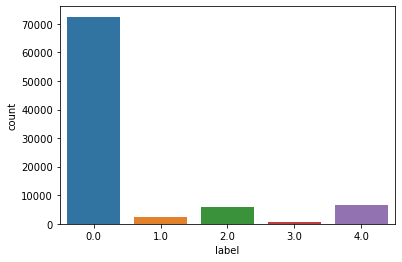

In [9]:
sns.countplot(x=train['label'])

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87554 entries, 0 to 87553
Columns: 188 entries, 0 to label
dtypes: float64(188)
memory usage: 125.6 MB


Visualising the heartbeats:

In [5]:
N=train.loc[train['label']==0.0].head(1)
S=train.loc[train['label']==1.0].head(1)
V=train.loc[train['label']==2.0].head(1)
F=train.loc[train['label']==3.0].head(1)
Q=train.loc[train['label']==4.0].head(1)

Text(0.5, 1.0, 'Normal heartbeat')

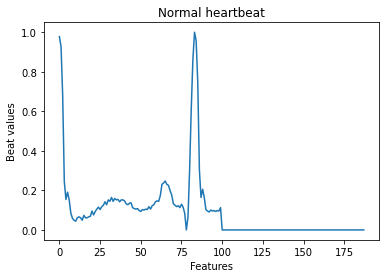

In [6]:

N=N.iloc[0].values
S=S.iloc[0].values
V=V.iloc[0].values
F=F.iloc[0].values
Q=Q.iloc[0].values

sns.lineplot(x=range(188),y=N)
plt.xlabel('Features')
plt.ylabel('Beat values')
plt.title('Normal heartbeat')  



Text(0.5, 1.0, 'Supraventricular ectopic heartbeat')

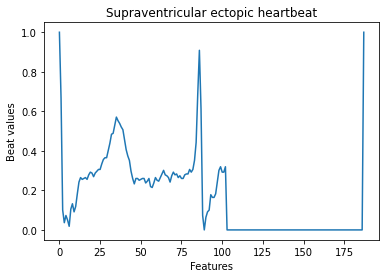

In [7]:
sns.lineplot(x=range(188),y=S)
plt.xlabel('Features')
plt.ylabel('Beat values')
plt.title('Supraventricular ectopic heartbeat') 

Text(0.5, 1.0, 'Ventricular ectopic heartbeat')

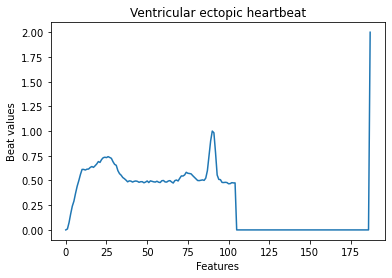

In [8]:
sns.lineplot(x=range(188),y=V)
plt.xlabel('Features')
plt.ylabel('Beat values')
plt.title('Ventricular ectopic heartbeat') 

Text(0.5, 1.0, 'Fusion heartbeat')

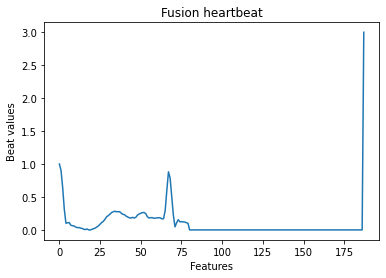

In [9]:
sns.lineplot(x=range(188),y=F)
plt.xlabel('Features')
plt.ylabel('Beat values')
plt.title('Fusion heartbeat')

Text(0.5, 1.0, 'Unknown heartbeat')

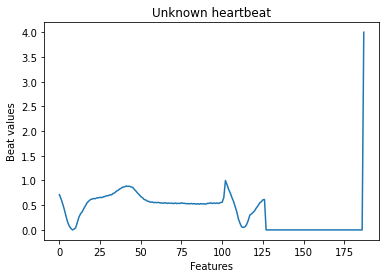

In [10]:
sns.lineplot(x=range(188),y=Q)
plt.xlabel('Features')
plt.ylabel('Beat values')
plt.title('Unknown heartbeat')

## Model Prep

In [36]:
y=train['label'].values
train.drop(['label'],axis=1,inplace=True)
X=train.values


In [37]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)

In [38]:
y_test=test['label'].values
test.drop(['label'],axis=1,inplace=True)
X_test=test.values

In [14]:
def classification_rep(model):
    model.fit(X_train,y_train)
    y_predicted= model.predict(X_val)
    print(classification_report(y_val,y_predicted))
    print(confusion_matrix(y_val,y_predicted))
    

## Model building

In [15]:
rf= RandomForestClassifier(random_state=42)

In [16]:
# Using kfold to obtain cross validation score
cv = KFold(n_splits=10, shuffle=True, random_state=1)
scores = cross_val_score(rf, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Cross val score:', (scores).mean())

Cross val score: 0.9755465583981378


In [16]:
classification_rep(rf)

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99     18205
         1.0       0.98      0.62      0.76       521
         2.0       0.97      0.88      0.92      1405
         3.0       0.92      0.64      0.75       175
         4.0       0.99      0.96      0.98      1583

    accuracy                           0.98     21889
   macro avg       0.97      0.82      0.88     21889
weighted avg       0.98      0.98      0.97     21889

[[18177     6    16     3     3]
 [  194   322     4     0     1]
 [  156     0  1238     7     4]
 [   50     0    13   112     0]
 [   66     0     2     0  1515]]


The model is performing well. However we shall try to improve it further by tuning the hyperparameters

## Hyperparameter tuning of Random forest model

Hyperparameter tuning using RandomSearchCV

In [18]:
n_estimators = [200,500,800]
max_features = ['auto', 'sqrt']
max_depth = [4,5,6,7,8]
max_depth.append(None)
bootstrap=[True, False]

#Creating grid of all parameters
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'bootstrap': bootstrap}

In [19]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, 
                               verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [4, 5, 6, 7, 8, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'n_estimators': [200, 500, 800]},
                   random_state=42, verbose=2)

In [20]:
# Choosing the best model which has optimal parameters and evaluating performance
best_random = rf_random.best_estimator_
classification_rep(best_random)

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99     18205
         1.0       0.98      0.61      0.76       521
         2.0       0.97      0.88      0.92      1405
         3.0       0.92      0.63      0.75       175
         4.0       1.00      0.96      0.98      1583

    accuracy                           0.98     21889
   macro avg       0.97      0.82      0.88     21889
weighted avg       0.98      0.98      0.97     21889

[[18175     6    18     3     3]
 [  194   320     6     0     1]
 [  159     0  1238     6     2]
 [   51     0    14   110     0]
 [   66     0     4     0  1513]]


There is not much differnce between the non tuned and the tuned model. This may be because the number of parameters defined in the parameter grid and number of iterations is low, so the area searched within the grid space would be very low. A much higher computing time would be required to search though more of the grid space.

## Feature Importance

In [21]:
importance = best_random.feature_importances_
feature_importance={}
for i,v in enumerate(importance):
    feature_importance[i]=v
feature_df=pd.DataFrame({'feature':feature_importance.keys(),'importance':feature_importance.values()})
feature_df = feature_df.sort_values(['importance'], ascending=[False])
feature_df

,feature,importance
4,4,0.045304
3,3,0.039097
5,5,0.037548
2,2,0.033365
6,6,0.030374
...,...,...
165,165,0.000214
175,175,0.000213
172,172,0.000209
174,174,0.000180


In [22]:
indexes=feature_df.loc[feature_df['importance'] > 0.005, 'feature']
(indexes.values)

array([  4,   3,   5,   2,   6,   1,  11,   7,   0,  10,   8,  37,  12,
        13,  36,  35,   9,  14,  24,  23,  38,  34,  15,  25,  22,  44,
        33,  45,  21,  46,  26,  43,  39,  20,  32,  19,  28,  17,  47,
        40,  16,  27,  42,  30,  41,  29,  18,  48,  31, 102, 101, 100,
       103,  98,  49,  97], dtype=int64)

In [39]:
# Taking subet of training data which only includes important features
X_train=X_train[:,indexes]
X_val=X_val[:,indexes]

In [40]:
classification_rep(best_random)

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99     18205
         1.0       0.96      0.60      0.74       521
         2.0       0.96      0.89      0.92      1405
         3.0       0.89      0.60      0.72       175
         4.0       0.99      0.96      0.97      1583

    accuracy                           0.97     21889
   macro avg       0.96      0.81      0.87     21889
weighted avg       0.97      0.97      0.97     21889

[[18163    13    19     5     5]
 [  199   313     7     0     2]
 [  142     1  1247     8     7]
 [   56     0    14   105     0]
 [   64     0     6     0  1513]]


Since hyperparameter tuning and feature selection haven't yielded better results, we will revert back to orginal train set finally check results on the test set.

In [46]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)
y_test=test['label'].values
test.drop(['label'],axis=1,inplace=True)
X_test=test.values

In [49]:
best_random.fit(X_train,y_train)
y_predicted= best_random.predict(X_test)
print(classification_report(y_test,y_predicted))
print(confusion_matrix(y_test,y_predicted))

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98     18118
         1.0       0.98      0.59      0.74       556
         2.0       0.98      0.87      0.92      1448
         3.0       0.88      0.58      0.70       162
         4.0       0.99      0.94      0.97      1608

    accuracy                           0.97     21892
   macro avg       0.96      0.80      0.86     21892
weighted avg       0.97      0.97      0.97     21892

[[18100     7     9     0     2]
 [  225   329     1     0     1]
 [  166     1  1263    13     5]
 [   54     0    14    94     0]
 [   89     0     3     0  1516]]
